In [11]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np

with open('intel.clf', 'r') as f:
   lasers = []
   odoms = []
   for line in f:
       tokens = line.split(' ')
       if tokens[0] == 'FLASER':
           num_readings = int(tokens[1])
           scans = np.array(tokens[2:2+num_readings], dtype=float)
           scan_time = float(tokens[2+num_readings+6])
           index = np.arange(-90, 90+180/num_readings, 180/num_readings)
           index = np.delete(index, num_readings//2)
           converted_scans = []
           angles = np.radians(index)
           converted_scans = np.array([np.cos(angles), np.sin(angles)]).T * scans[:, np.newaxis]
           lasers.append(np.array(converted_scans))
           x = float(tokens[2+num_readings])
           y = float(tokens[3+num_readings])
           theta = float(tokens[4+num_readings])
           odoms.append([x, y, theta])

odoms = np.array(odoms)
lasers = np.array(lasers)
lasers = lasers.round(decimals = 2) #rounding of values for downsampling

In [12]:
# Removing the laser readings that are too far (basic range - based filter)
for i in range(len(lasers)):
    for j in range(len(lasers[i])):
        if lasers[i,j,0]> 10 or lasers[i,j,1] > 10:
            lasers[i,j,0] = 0
            lasers[i,j,1] = 0

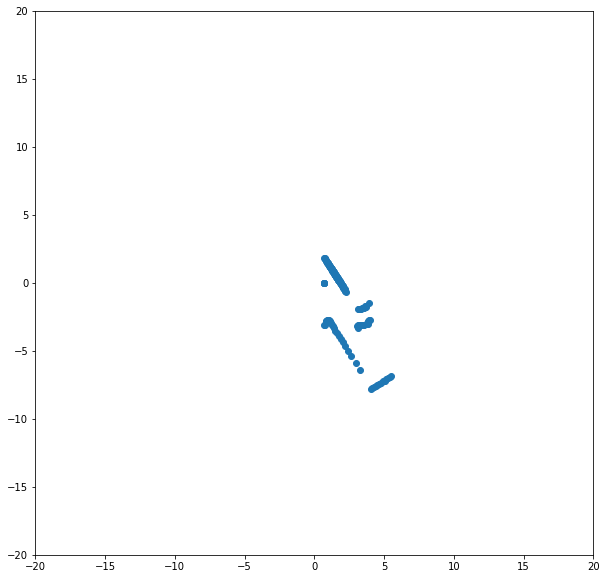

In [43]:
#Walking through the lidar values (TODO: The laser scans are not rotated to the bot heading)
from IPython.display import clear_output
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim([-20, 20])

for i in range(150,200): #Range of the frames to be viewed ex: 100 to 150
    plt.xlim([-20, 20])
    plt.ylim([-20,20])
    clear_output(wait=True)
   #plt.scatter(lasers[i,:,0]*np.sin(odoms[i,2])  + odoms[i,0], lasers[i,:,1]*np.cos(odoms[i,2])+odoms[i,1])
    plt.scatter(lasers[i,:,0]  + odoms[i,0], lasers[i,:,1] + odoms[i,1])
    plt.pause(.1)
plt.show()

In [ ]:
import numpy as np
from PIL import Image as im

data = im.fromarray(scan_grid)
data = data.convert("L")
data.save('lidar2d.png')